In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import pickle

In [ ]:
import sklearn
sklearn.__version__

'1.3.0'

In [ ]:
# Function to generate a cumulative DataFrames with all Batter Match Data and Bowler Match data
def make_df(path, var):

  data = []

  for i in range(254):
    file_path = path+"/Match"+str(i)+var+".csv"
    temp_df = pd.read_csv(file_path)

    for i in temp_df.values:
      data.append(i[1:])

  return data

Batter_path = "/content/drive/MyDrive/PROJECT/Batter_Match_Data"
Bowler_path = "/content/drive/MyDrive/PROJECT/Bowler_Match_Data"

Batter_data = make_df(Batter_path, "Bat")
Bowler_data = make_df(Bowler_path, "Bowl")

In [ ]:
Train_bat = pd.DataFrame(data = Batter_data, columns = ['Player','Mat','Inns','Runs','HS','Ave','BF','SR','100','50','0','4s','6s','IsInD11'])
Train_bowl = pd.DataFrame(data = Bowler_data, columns = ['Player','Mat','Inns','Overs','Mdns','Runs','Wkts','Ave','Econ','SR','4','5','IsInD11'])

In [ ]:
Train_bowl

,Player,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4,5,IsInD11
0,R Ashwin,46,46,171.0,2,1193,52,22.94,6.97,19.7,2,0,0
1,T Boult,27,27,98.5,1,854,39,21.89,8.64,15.2,1,0,1
2,O McCoy,2,1,3.0,0,44,1,44.00,14.66,18.0,0,0,0
3,Y Chahal,36,36,140.3,1,1139,52,21.90,8.10,16.2,2,1,1
4,R Tewatia,61,57,228.0,3,3648,64,57.00,16.00,21.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,U Yadav,7,7,25.0,0,219,9,24.33,8.76,16.6,0,0,0
2051,M Siraj,3,3,12.0,0,148,3,49.33,12.33,24.0,0,0,1
2052,D Bravo,38,34,136.0,1,1496,26,57.54,11.00,31.0,2,1,1
2053,D Chahar,10,10,35.5,1,251,17,14.76,7.00,12.6,0,1,0


# **EXPLPORATORY DATA ANALYSIS**

In [ ]:
Train_bat.isnull().sum()

Player     0
Mat        0
Inns       0
Runs       0
HS         0
Ave        0
BF         0
SR         0
100        0
50         0
0          0
4s         0
6s         0
IsInD11    0
dtype: int64

In [ ]:
Train_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533 entries, 0 to 3532
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   3533 non-null   object 
 1   Mat      3533 non-null   int64  
 2   Inns     3533 non-null   int64  
 3   Runs     3533 non-null   int64  
 4   HS       3533 non-null   int64  
 5   Ave      3533 non-null   float64
 6   BF       3533 non-null   int64  
 7   SR       3533 non-null   float64
 8   100      3533 non-null   int64  
 9   50       3533 non-null   int64  
 10  0        3533 non-null   int64  
 11  4s       3533 non-null   int64  
 12  6s       3533 non-null   int64  
 13  IsInD11  3533 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 386.5+ KB


In [ ]:
Train_bat.describe()

,Mat,Inns,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,IsInD11
count,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000,3533.000000
mean,42.101896,36.237758,1010.544297,63.089159,27.861735,760.384093,129.319476,0.220776,3.932635,2.864421,75.135579,37.256439,0.492216
std,21.706991,20.975261,676.076529,27.946919,9.752006,499.008256,18.675634,0.707066,4.696206,2.496774,56.105320,25.642181,0.500010
min,2.000000,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,22.000000,310.000000,47.000000,22.600000,223.000000,121.430000,0.000000,0.000000,1.000000,21.000000,15.000000,0.000000
50%,43.000000,37.000000,1138.000000,62.000000,29.820000,819.000000,129.350000,0.000000,2.000000,2.000000,79.000000,43.000000,0.000000
75%,53.000000,47.000000,1443.000000,74.000000,34.020000,1148.000000,140.850000,0.000000,6.000000,5.000000,98.000000,51.000000,1.000000
max,104.000000,96.000000,2633.000000,172.000000,57.250000,1907.000000,216.660000,4.000000,24.000000,9.000000,247.000000,120.000000,1.000000


In [ ]:
Train_bowl.describe()

,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4,5
count,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000
mean,31.715815,30.204380,111.285158,1.415572,1016.324574,34.250608,29.716326,8.702910,20.065839,0.978589,0.338200
std,20.022213,18.816158,72.079378,1.450431,876.175858,22.674745,13.425089,2.586131,5.358673,1.106117,0.532284
min,1.000000,1.000000,3.000000,0.000000,27.000000,1.000000,11.630000,5.460000,10.900000,0.000000,0.000000
25%,11.000000,11.000000,35.500000,0.000000,275.000000,13.000000,21.250000,6.970000,16.500000,0.000000,0.000000
50%,36.000000,34.000000,128.500000,1.000000,861.000000,37.000000,26.400000,8.100000,19.700000,1.000000,0.000000
75%,47.000000,46.000000,171.000000,2.000000,1300.000000,52.000000,35.300000,9.000000,24.000000,2.000000,1.000000
max,75.000000,75.000000,256.400000,5.000000,3944.000000,84.000000,74.000000,17.000000,44.600000,3.000000,2.000000


# **DATA PREPROCESSING**

In [ ]:
Train_bat  = Train_bat.drop(columns = ["Player"])
Train_bowl  = Train_bowl.drop(columns = ["Player"])

In [ ]:
X_bat = Train_bat[['Mat','Inns','Runs','HS','Ave','BF','SR','100','50','0','4s','6s']]
y_bat = Train_bat["IsInD11"]

X_bowl = Train_bowl[['Mat','Inns','Overs','Mdns','Runs','Wkts','Ave','Econ','SR','4','5']]
y_bowl = Train_bowl["IsInD11"]

In [ ]:
X_bat.shape,X_bowl.shape

((3533, 12), (2055, 11))

In [ ]:
data = []
for i in y_bowl:
  if i == '2' or i == '`1':
    data.append('1')
  else:
    data.append(str(i))

y_bowl = pd.Series(data = data)

> # Visualisation

In [ ]:
y_bat.value_counts()

0    1794
1    1739
Name: IsInD11, dtype: int64

Text(0, 0.5, 'count')

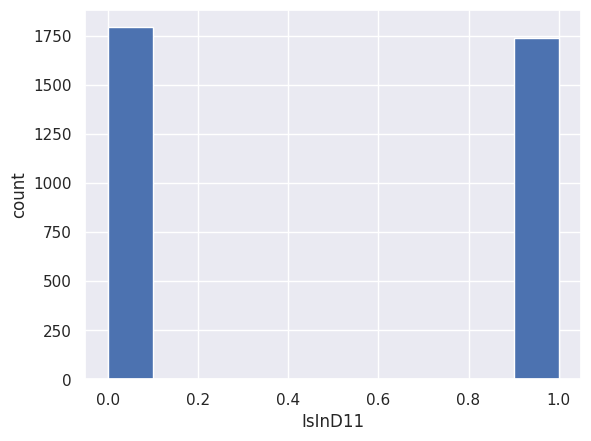

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
y_bat.hist()
plt.xlabel('IsInD11')
plt.ylabel('count')

In [ ]:
y_bowl.value_counts()

1    1034
0    1021
dtype: int64

Text(0, 0.5, 'count')

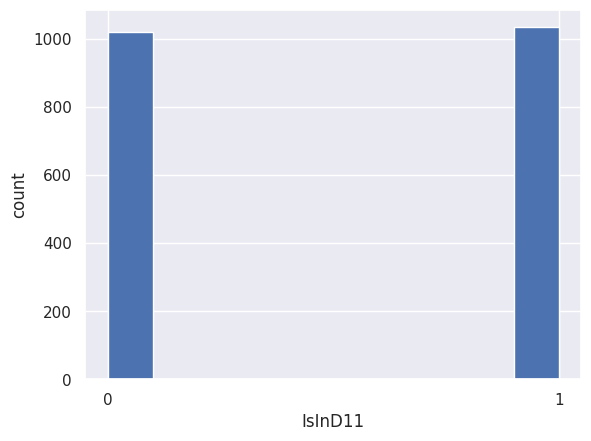

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
y_bowl.hist()
plt.xlabel('IsInD11')
plt.ylabel('count')

> # Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_bat = le.fit_transform(y_bat)
y_bowl = le.fit_transform(y_bowl)

> # Feature Engineering and Scaling Pipeline

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.preprocessing import StandardScaler

pipeline_steps = [
    ("Generic Univariate Select", GenericUnivariateSelect(chi2, mode='k_best', param=10)),
    ("Standard Scaler", StandardScaler())
]

pipe = Pipeline(steps = pipeline_steps)

In [ ]:
X_transformed_bat = pipe.fit_transform(X_bat, y_bat)

file3 = "/content/drive/MyDrive/PROJECT/Saved_Models/pipeline_bat.pickle"
pickle.dump(pipe, open(file3,"wb"))

In [78]:
X_transformed_bowl = pipe.fit_transform(X_bowl,y_bowl)

file4 = "/content/drive/MyDrive/PROJECT/Saved_Models/pipeline_bowl.pickle"
pickle.dump(pipe, open(file4,"wb"))

In [73]:
X_bat

,Mat,Inns,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,57,50,1550,61,25.80,1450,106.90,0,7,9,91,44
1,66,58,1260,73,26.80,912,138.15,0,7,3,102,53
2,45,40,1440,63,23.83,1120,128.57,0,2,4,103,48
3,48,43,1376,46,29.00,1204,114.29,0,5,6,93,47
4,20,18,279,56,16.41,223,125.11,0,1,2,19,17
...,...,...,...,...,...,...,...,...,...,...,...,...
3528,9,6,122,58,20.33,99,123.23,0,1,0,12,3
3529,46,22,163,25,11.64,165,98.78,0,0,2,7,4
3530,98,85,1617,56,37.60,1282,126.13,0,2,1,116,52
3531,7,6,117,44,39.00,102,114.70,0,0,0,6,3


> # Train Test Split

In [64]:
# Batter training set

from sklearn.model_selection import train_test_split

X_bat_train, X_bat_test, y_bat_train, y_bat_test = train_test_split(
    X_transformed_bat, y_bat, test_size=0.05, random_state=42
)

In [65]:
# Bowler training set

from sklearn.model_selection import train_test_split

X_bowl_train, X_bowl_test, y_bowl_train, y_bowl_test = train_test_split(
    X_transformed_bowl, y_bowl, test_size=0.05, random_state=42
)

# **MODEL TRAINING AND TESTING**

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        88
           1       0.63      0.63      0.63        89

    accuracy                           0.63       177
   macro avg       0.63      0.63      0.63       177
weighted avg       0.63      0.63      0.63       177



<Axes: >

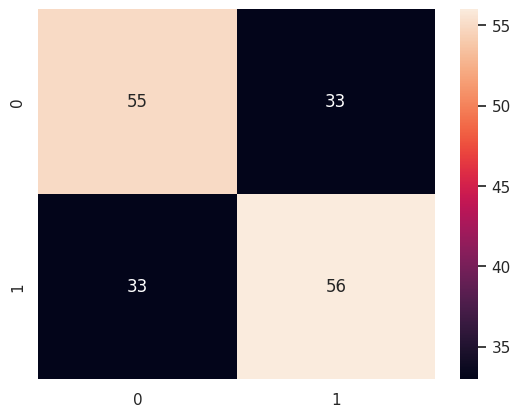

In [67]:
# Bat model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the gradienrt boosting model
gradient_boosting = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'loss' : ['log_loss', 'exponential'],
    'learning_rate' : [0.01, 0.05, 0.1],
    'n_estimators' : [300, 400, 500],
    'max_depth' : [4, 6, 8],
    'criterion' : ['friedman_mse', 'squared_error']
}

# Perform grid search with cross-validation
grid_search_bat = GridSearchCV(gradient_boosting, param_grid, cv=5)
grid_search_bat.fit(X_bat_train, y_bat_train)

pred_GBGS_bat = grid_search_bat.predict(X_bat_test)

print(classification_report(y_bat_test , pred_GBGS_bat))
cf_mat = confusion_matrix(y_bat_test , pred_GBGS_bat)
sns.heatmap(cf_mat, fmt='', annot=True)

In [68]:
grid_search_bat.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 8,
 'n_estimators': 400}

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        46
           1       0.69      0.67      0.68        57

    accuracy                           0.65       103
   macro avg       0.65      0.65      0.65       103
weighted avg       0.65      0.65      0.65       103



<Axes: >

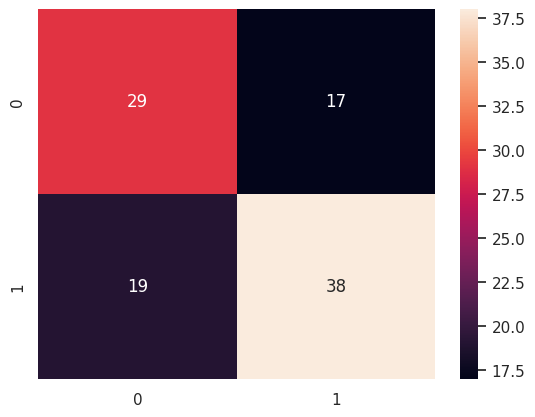

In [69]:
# Bowl model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the random forest model
random_forest = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [300, 400, 500, 600],
    'max_depth': [4, 6, 8],
    'criterion': ["log_loss","entropy","gini"]
}

# Perform grid search with cross-validation
grid_search_bowl = GridSearchCV(random_forest, param_grid, cv=5)
grid_search_bowl.fit(X_bowl_train, y_bowl_train)

pred_RFGS_bowl = grid_search_bowl.predict(X_bowl_test)

print(classification_report(y_bowl_test , pred_RFGS_bowl))
cf_mat = confusion_matrix(y_bowl_test , pred_RFGS_bowl)
sns.heatmap(cf_mat, fmt='', annot=True)

In [70]:
grid_search_bowl.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 500}

# **SAVE MODELS**

In [71]:
import pickle

file1 = "/content/drive/MyDrive/PROJECT/bat_model.pickle"
pickle.dump(grid_search_bat, open(file1,"wb"))

file2 = "/content/drive/MyDrive/PROJECT/bowl_model.pickle"
pickle.dump(grid_search_bowl, open(file2,"wb"))